In [8]:
from datetime import datetime
import pandas as pd
from geopy import distance
import numpy as np

import pymongo
from pymongo import MongoClient

from sklearn.cluster import DBSCAN

from sklearn.metrics.pairwise import pairwise_distances

import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [9]:
client = MongoClient('localhost', 27017)

db = client['avl_pipeline_test']
trip_coll = db['trips']
edge_coll = db['edges_standardized']

In [15]:
# wknd_filter = {
#     "weekend": 1,
# }

projection = {
    "_id": 0,
    "trip_duration": 1,
    "minute_from_15hr_sqr": 1,
    "minute_since_midnight": 1
}

trips = list(trip_coll.find({}, projection))
trip_lst = [item['trip_duration'] for item in trips]
trip_15_lst = [item['minute_from_15hr_sqr'] for item in trips]
trip_msm = [item['minute_since_midnight'] for item in trips]

Text(0,0.5,'Trip duration')

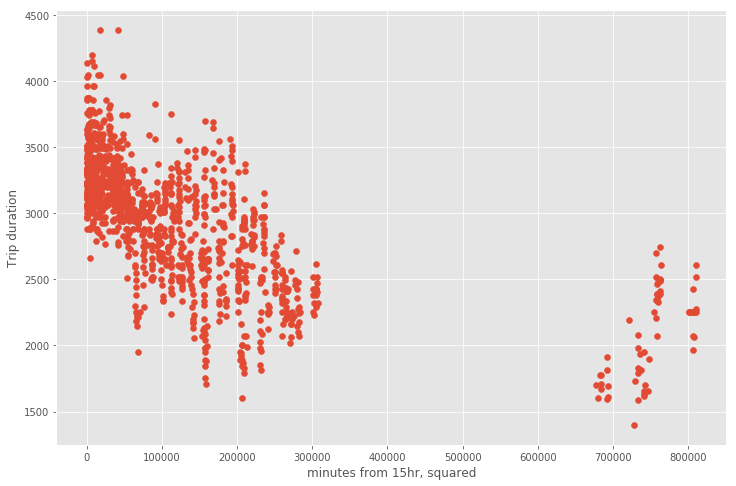

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(trip_15_lst, trip_lst)
ax.set_xlabel("minutes from 15hr, squared")
ax.set_ylabel("Trip duration")

Text(0,0.5,'Trip duration')

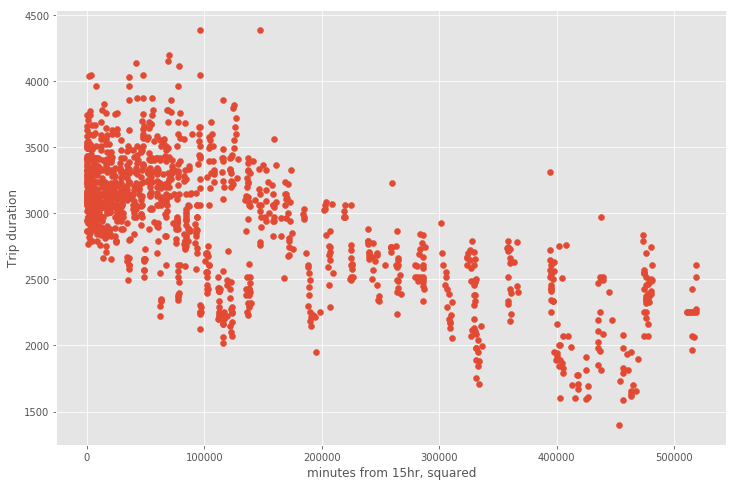

In [20]:
hella = (np.array(trip_msm) - 720)**2
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(hella, trip_lst)
ax.set_xlabel("minutes from 15hr, squared")
ax.set_ylabel("Trip duration")

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
y = np.array(wknd_lst).reshape(-1,1)
X = np.array(wknd_msm_lst).reshape(-1,1)
X = (X**2)

array([[ 369664],
       [ 559504],
       [ 790321],
       [1060900],
       [1368900],
       [1671849],
       [ 370881],
       [ 559504],
       [ 792100],
       [1371241],
       [    729],
       [    841],
       [ 370881],
       [ 792100],
       [1062961],
       [1366561],
       [1669264],
       [ 370881],
       [1058841],
       [1368900],
       [1674436],
       [    676],
       [1371241],
       [1687401],
       [ 369664],
       [ 561001],
       [ 792100],
       [1062961],
       [1677025],
       [ 143641],
       [ 346921],
       [ 532900],
       [ 756900],
       [1020100],
       [1320201],
       [1661521],
       [1985281],
       [ 143641],
       [ 219961],
       [ 346921],
       [ 532900],
       [ 755161],
       [1018081],
       [1322500],
       [1666681],
       [1985281],
       [ 142884],
       [ 220900],
       [ 143641],
       [ 219961],
       [ 348100],
       [ 529984],
       [1018081],
       [1322500],
       [1661521],
       [19

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
# fit with sklearn OLS
ols = LinearRegression()
ols.fit(X_train, y_train)
ols.score(X_test, y_test)

-0.0033877705995160046